<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro To Flask

Author:  Dave Yerrington (SF)

<img src="https://snag.gy/seOJAm.jpg">


## Objectives

- Understand how routes are defined
- Consuming your web service with Pandas

By this point, you should have completed your Flask and `virtualenv` setup from the previous notebook, `2-flask_virtualenv_setup`.

## Get Atom or Sublime

Contextually, we will be running our Flask application from the command line.  Since Flask is designed to run as a service from the command line to serve HTTP requests, using Jupyter is impractical.  While it can be done, the output of the Flask service runs indeffinately and will eventually crash your browser.  Since an application like a Flask service is intended to service data and/or web pages to an end user on the internet, we should run it in the context that closely represents the states and environment in which it optimally runs.

- https://atom.io/
- https://www.sublimetext.com/

Which one is better?  Neither.  The code editor that you choose to master, will provide the best productivity.  Debating advanced editors is impractical until you've developed enough knowledge about code editing to know what is important.  Learning one won't make it difficult to learn another.  The knowledge you gain from experience will guide your future choices so don't focus too much on which one to use but do make a choice and stick with it for a while.


## What is Flask

Flask is a Python micro-framework to develop and delploy web applications and services.  We learned a little bit about how web services are designed from our first notebook and the [PokeAPI](https://www.pokeapi.co/docsv2/) example.

- Very lightweight framework
- Easy to learn
- Build a web service API to serve data
- Build your own website

> A web application is an excellent way to showcase your data science work to potential employers.

## 1. Extending our Current Flask Service

Using our `service.py` file, based on the example we started from in our previous notebook, we will create a new method inside of it and explore the idea of **routes**.

#### Setup a new "json" route - (not using Docker)

> Remember:  Do this with your code editor, not in Jupyter.


Add a list of dictionaries called `my_data` before you define any routes.  Since this data is static (it won't change), we shouldn't need to load it every single time we request a route.

```python
## Define this data outside your function within your service.py file
my_data = [
    {"student": "Anthony", "Speed": 23.5, "Power": "over 9000"},
    {"student": "Ruairi", "Speed": 23.55, "Power": "over 9000"},
    {"student": "Sam", "Speed": 23.2255, "Power": "over 9000"},
    {"student": "Evan", "Speed": 23.52553234, "Power": "over 9000"},
]
```

Add a new method with route decorator to our **service.py** file.

```python
@app.route('/json-test')
def json_test():
    return jsonify(my_data)

```

Then check it out in your browser:
http://127.0.0.1:5000/json-test

In [ ]:
import pandas as pd

## Optionally we can consume this endpoint with Pandas
## Check this out after you've updated your service file!
pd.read_json("http://127.0.0.1:5000/json-test")

## 2. Build a basic predictive model and serve the predictions

Below is a function that will build a predictive model each and every time with test data, then look for the parameter "speed", and serve a response with the predicted class labels, and associated probabilities for each class.

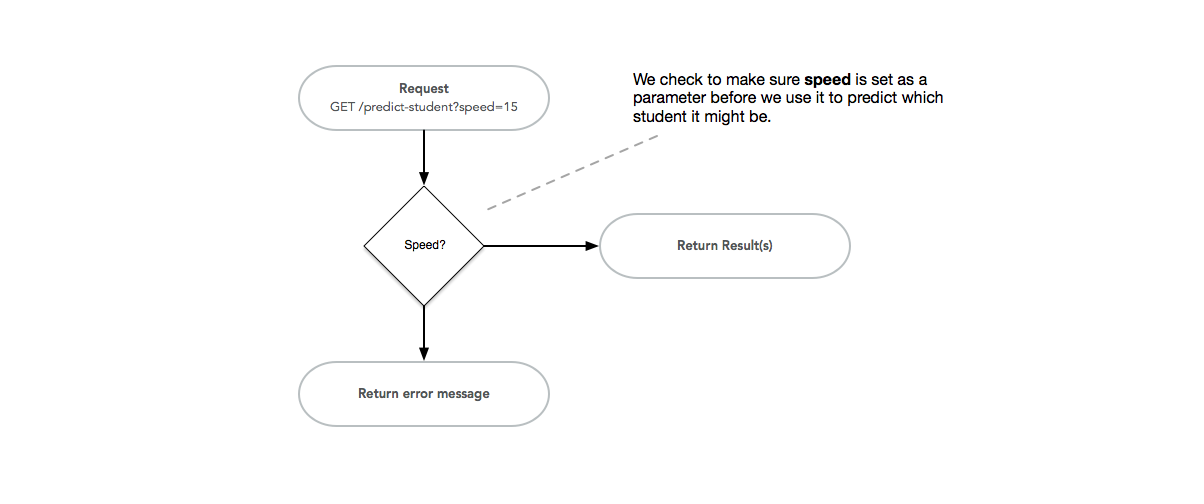


**Setup a model outside your route function**

```python
my_data = [
    {"student": "Anthony", "Speed": 23.5, "Power": "over 9000"},
    {"student": "Ruairi", "Speed": 23.55, "Power": "over 9000"},
    {"student": "Sam", "Speed": 23.2255, "Power": "over 9000"},
    {"student": "Evan", "Speed": 23.52553234, "Power": "over 9000"},
]

df = pd.DataFrame(my_data)

logreg = LogisticRegression()
model = logreg.fit(df[['Speed']].values, df["student"].values)
```

**Use the model to predict values sent to the route**

Here we can send the `speed` parameter with the value `15` to our new service route `predict-student`, by using the endpoint:
http://127.0.0.1:5000/predict-student?speed=15


```python
@app.route('/predict-student')
def predict_student():

    speed = request.args.get("speed")

    if speed:
        predicted = model.predict([float(speed)]).tolist()
        probabilities = model.predict_proba([float(speed)]).tolist()
        result = {
            "response": "ok", 
            "predictions": predicted, 
            "probabilities": {student: probabilities[0][index] for index, student in enumerate(model.classes_.tolist())}
        } 
    else:
        result = {"response": "not found", "message": "Please provide a model parameter to predict!"}

    return jsonify(result)
```

To see how this works, load this endpoint and experiment with the parameter "speed":
- Values between 1-30
- No value set
- String type value (see the error)

### Reference `service.py` file

Your file should look somewhat like this one after you've followed the guide above.

> Note:  This is not intended to run in Jupyter notebook.  You should be running Flask from the command line as outlined so far.

In [2]:
from flask import Flask, jsonify, request
from sklearn.linear_model import LogisticRegression
import pandas as pd

app = Flask(__name__)

my_data = [
    {"student": "Anthony", "Speed": 23.5, "Power": "over 9000"},
    {"student": "Ruairi", "Speed": 23.55, "Power": "over 9000"},
    {"student": "Sam", "Speed": 23.2255, "Power": "over 9000"},
    {"student": "Evan", "Speed": 23.52553234, "Power": "over 9000"},
]

df = pd.DataFrame(my_data)

logreg = LogisticRegression()
model = logreg.fit(df[['Speed']].values, df["student"].values)

@app.route('/predict-student')
def predict_student():

    speed = request.args.get("speed")

    if speed:
        predicted = model.predict([float(speed)]).tolist()
        probabilities = model.predict_proba([float(speed)]).tolist()
        result = {
            "response": "ok", 
            "predictions": predicted, 
            "probabilities": {student: probabilities[0][index] for index, student in enumerate(model.classes_.tolist())}
        } 
    else:
        result = {"response": "not found", "message": "Please provide a model parameter to predict!"}
        
    return jsonify(result)

@app.route('/')
def hello_world():
    return 'Hello, World!'

/Users/gateam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gateam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Recommended Reading

For a more complete tutorial / deep dive on a slightly more "web app" type application, check out the main flask walkthrough on their site.  It's quite good.  In the future we will learn to build a much more in-depth web application using Django.

http://flask.pocoo.org/docs/0.12/tutorial/

<style>
    .container { width:100% !important; }


    .CodeMirror pre {
        font-size: 150%;
        line-height: 120%;
    }

    .cm-header {
        font-size: 150%;
        line-height: 120%;
    }

    div.output {
        font-size: 150%;
        line-height: 120%;
    }
    div.text_cell_render {
        font-size: 150%;
        line-height: 120%;
    }
</style>